<a href="https://colab.research.google.com/github/harishmuh/machine_learning_practices/blob/main/simple_linear_regression_tutorial_tips_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# `Simple Linear Regression`



#### `Context`

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair treatment of the servers, for whom tips (at least in restaurants in the United States) are a major component of pay.

In short, predicting tips helps restaurants estimate total staff income (base wage + tips). The managers can adjust wages, shift allocation, and staffing based on predicted tipping patterns.

**About dataset**

In one restaurant, a food server recorded the following data on all customers they served during an interval of two and a half months in early 1990. The restaurant, located in a suburban shopping mall, was part of a national chain and served a varied menu. In observance of local law the restaurant offered seating in a non-smoking section to patrons who requested it. Each record includes a day and time, and taken together, they show the server’s work schedule.

From this information, we frame the problem:

1. Problem Statements: How might we predict tips that will be received by food servers?
2. Dataset: Tips
3. Label: Tip
4. Features: Total Bill
5. ML Objective: Create a prediction model to predict the amount of tip based on the Total_Bill feature.
6. Added Value: Provide more data-driven insights to improve employee benefits and fairer employee treatment.

`Initial Setup`

In [ ]:
from logging import warning
# Importing required libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### `Data Understanding`

In [ ]:
# Loading dataset
tips = sns.load_dataset('tips')
print(f'Total rows and columns: {tips.shape}')

tips.head()

Total rows and columns: (244, 7)


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
# Data summary
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


**Initial Assesment**

#### `Exploratory data analysis`

To understand our data, we will conduct:
* `Descriptive statistic`
* `Data distribution`
* `Graphical summary`
* `Univariate Analysis`
* `Bivariate Analysis`

**Univariate Analysis**

`Checking Unique Value`

In [ ]:
# Check the data type, null values, and unique values ​​of each column
pd.DataFrame({
  'feature': tips.columns.values,
  'data_type': tips.dtypes.values,
  'null': tips.isna().mean().values * 100,
  'negative': [True if tips[col].dtype == int and (tips[col] < 0).any() else False for col in tips.columns],
  'n_unique': tips.nunique().values,
  'sample_unique': [tips[col].unique() for col in tips.columns]
})

,feature,data_type,null,negative,n_unique,sample_unique
0,total_bill,float64,0.0,False,229,"[16.99, 10.34, 21.01, 23.68, 24.59, 25.29, 8.7..."
1,tip,float64,0.0,False,123,"[1.01, 1.66, 3.5, 3.31, 3.61, 4.71, 2.0, 3.12,..."
2,sex,category,0.0,False,2,"['Female', 'Male'] Categories (2, object): ['M..."
3,smoker,category,0.0,False,2,"['No', 'Yes'] Categories (2, object): ['Yes', ..."
4,day,category,0.0,False,4,"['Sun', 'Sat', 'Thur', 'Fri'] Categories (4, o..."
5,time,category,0.0,False,2,"['Dinner', 'Lunch'] Categories (2, object): ['..."
6,size,int64,0.0,False,6,"[2, 3, 4, 1, 6, 5]"


`Descriptive statistic`

In [ ]:
# descriptive statistic
display(tips.describe(), tips.describe(include='category'))

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [ ]:
# descriptive statistic
tips[['total_bill', 'tip']].describe()

,total_bill,tip
count,244.000000,244.000000
mean,19.785943,2.998279
std,8.902412,1.383638
min,3.070000,1.000000
25%,13.347500,2.000000
50%,17.795000,2.900000
75%,24.127500,3.562500
max,50.810000,10.000000


`graphical summary`

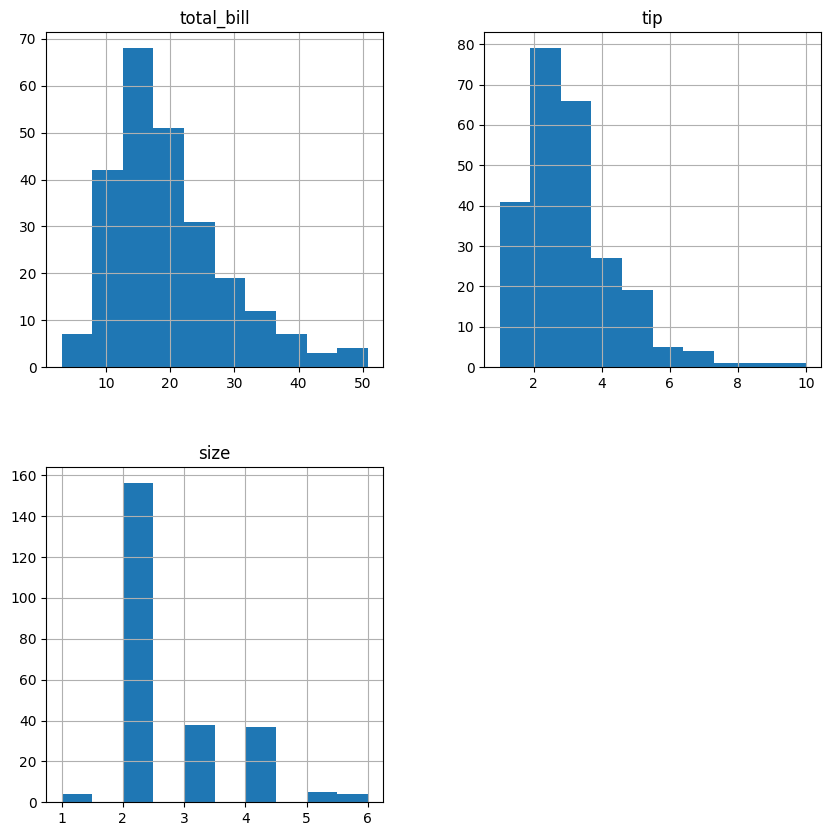

In [ ]:
# data distribution # Univariate Analysis
tips.hist(figsize=(10, 10), bins=10)
plt.show()

In [ ]:
# Library for statistics
from scipy import stats

# Check normality
# Checking statistics with normality test
num_only = tips.select_dtypes(include=['int','float']).columns
for i in num_only :
  print(f'normaltest for column {i}')
  stat,pvalue = stats.normaltest(tips[i])
  alpha = 0.05

  if pvalue > alpha :
    print(f'pvalue={pvalue}.pvalue > {alpha}. Fail to reject H0. We can assume that the data is normally distributed')
  else :
    print(f'pvalue={pvalue}.pvalue < {alpha}. Reject H0. We can assume that the data is NOT normally distributed')

normaltest for column total_bill
pvalue=1.5951078766352608e-10.pvalue < 0.05. Reject H0. We can assume that the data is NOT normally distributed
normaltest for column tip
pvalue=5.796294322907102e-18.pvalue < 0.05. Reject H0. We can assume that the data is NOT normally distributed
normaltest for column size
pvalue=9.580202540024401e-15.pvalue < 0.05. Reject H0. We can assume that the data is NOT normally distributed


All numerical data are not normally distributed

**Bivariate analysis**

`correlation`

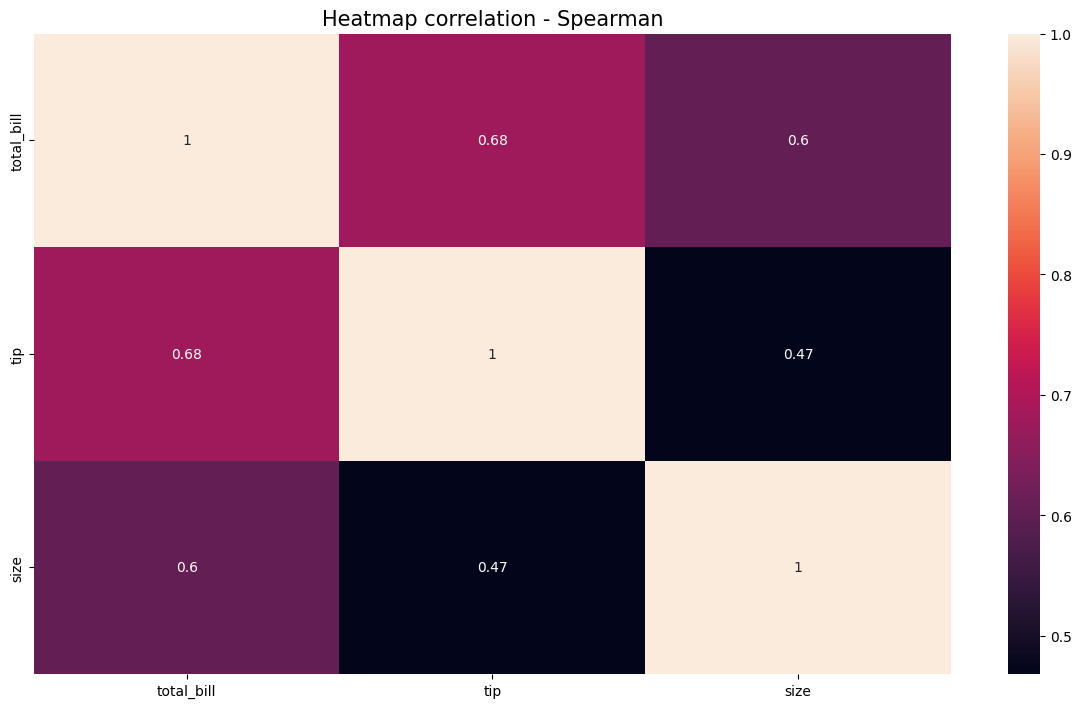

In [ ]:
# Heatmap Correlation
plt.figure(figsize=(12,7))
sns.heatmap(tips.select_dtypes(include=['int','float']).corr(method= 'spearman'), annot=True)
plt.tight_layout()
plt.title('Heatmap correlation - Spearman', fontsize=15)
plt.show()

Insight:
* Positive correlation total_bill vs tip (0.68)
* Positive correlation size vs tip (0.47)
* Positive correlation tota_bill vs size (0.6)


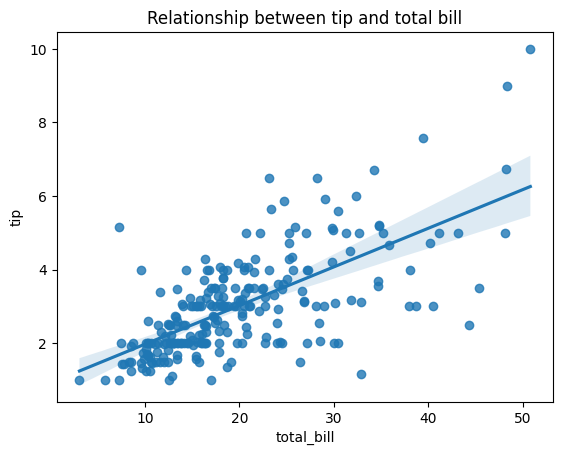

In [ ]:
# tip vs total bill # Bivariate analysis # regplot
sns.regplot(data=tips, y='tip', x='total_bill')
plt.title('Relationship between tip and total bill')
plt.show()

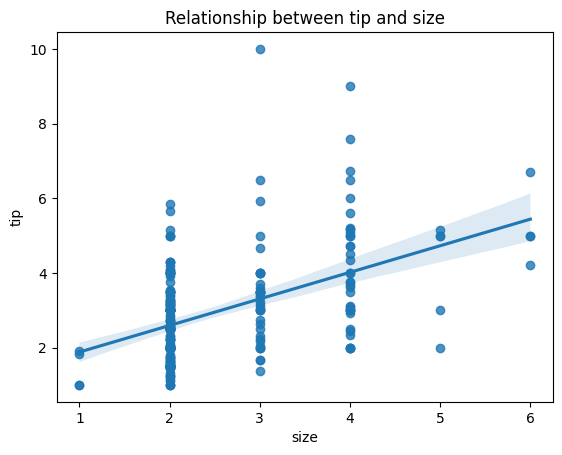

In [ ]:
# tip vs total bill # Bivariate analysis # regplot
sns.regplot(data=tips, y='tip', x='size')
plt.title('Relationship between tip and size')
plt.show()

We can also use parplot for bivariate analysis.

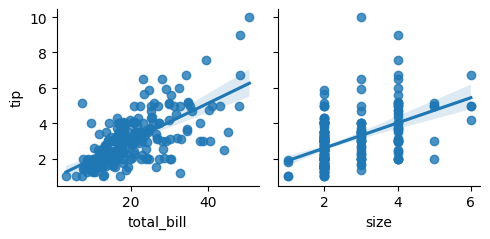

In [ ]:
# Bivariate Analysis
sns.pairplot(data=tips, x_vars=["total_bill", "size"], y_vars="tip", kind="reg")
plt.tight_layout()
plt.show()

#### `Data Preparation`

We start to apply simple linear regression to the dataset:

- y: Tips
- X: Total Bill

In [ ]:
# define feature and target
y = tips['tip'] # target # created in series
X = sm.add_constant(tips[['total_bill']]) # feature is constant and total_bill # usually in matrix form

In [ ]:
X

,const,total_bill
0,1.0,16.99
1,1.0,10.34
2,1.0,21.01
3,1.0,23.68
4,1.0,24.59
...,...,...
239,1.0,29.03
240,1.0,27.18
241,1.0,22.67
242,1.0,17.82


In [ ]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


#### `Modeling`

In [ ]:
# Modeling - Linear regression

# define model
linreg = sm.OLS(y, X) # OLS: Ordinary Least Square

# Fitting model
result = linreg.fit()

In [ ]:
# Result summary
print(result.summary())

# Berarti persamaannya y = Bo + B1x
# tips = constanta + B1x
# tips = 0.9203 + 0.105x

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Tue, 09 Sep 2025   Prob (F-statistic):           6.69e-34
Time:                        00:57:02   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [ ]:
# Model parameters
print("Intercept (β0):", round((result.params[0]),3))
print("Slope (β1):", round((result.params[1]),3))

Intercept (β0): 0.92
Slope (β1): 0.105


**Model Interpretation**

`Equation`:

$$\text{y} = \beta_{0} + \beta_{1} * \text{X}$$
$$\text{tips} = 0.9203 + 0.1050 * \text{total bill}$$

`F-Test:`

- `H0`: $\beta_{1}=0$. Total bill does not significantly affect tips.
- `H1`: $\beta_{1}!=0$. Total bill significantly affects tips. (There is at least one variable that significantly affects the target. But we don't know which one)
- $\alpha=0.05$
- Prob(F-Statistic): 6.69e-34
- p-value < 0.05. Reject `H0`.
- This means we have sufficient evidence that the total bill significantly affects tips given to waiters.
Partial Test:
- $\beta_{0}$: const (intercept)
  - `H0`: $\beta_{0}=0$. The model does not require an intercept.
  - `H1`: $\beta_{0}!=0$. The model requires an intercept.
  - $\alpha=0.05$
  - P>|t|: 0.000
  - p-value < 0.05. Reject `H0`.
  - This means we have sufficient evidence that the model requires an intercept.

- $\beta_{1}$: total bill (slope)
  - `H0`: $\beta_{1}=0$. The total bill does not significantly affect tips.
  - `H1`: $\beta_{1}!=0$. The total bill significantly affects tips.
  - $\alpha=0.05$
  - P>|t|: 0.000
  - p-value < 0.05. Reject `H0`.
  - This means we have sufficient evidence that **total bill significantly influences tips**.
`Parameter Estimate`:
- $\beta_{0}=0.9203$. This means the tip is worth 0.9203 USD when the total bill is 0 USD. (This case is actually invalid, because the value x=0 falls outside the range of total bills between 3.07 USD and 50.81 USD. But we know the model needs an intercept.)
- $\beta_{1}=0.1050$. This means that when the total bill increases by 1 USD, the tip will increase by 0.105 USD. This interpretation only applies to total bill values ​​within the range of 3.07 USD and 50.81 USD.

`Coefficient of Determination`:
- R-squared: 0.457
- This model (which only uses the total bill feature) can explain 45.7% of the variation in tips. The remaining 54.3% can be explained by other features not included in the model.

**Model implementation example**

In [ ]:
# Predict to New Data
# “If the intercept = 1 and the total_bill = 16, what tip does the model predict?”
result.predict([1,16])

array([2.60066189])

So, the model predicts a tip ≈ USD 2.60 for USD 16 bill.

#### `Model Evaluation`

In [ ]:
# Calculating predicted tips based on total bill

# Method 1
test = X.copy()
test['y_pred'] = test['const'] * 0.9203 + test['total_bill'] * 0.105
test.head()

,const,total_bill,y_pred
0,1.0,16.99,2.70425
1,1.0,10.34,2.00600
2,1.0,21.01,3.12635
3,1.0,23.68,3.40670
4,1.0,24.59,3.50225


In [ ]:
# Calculating predicted tips based on total bill

# Method 2
y_pred = result.predict(X)

df_result = pd.DataFrame({
    'y_actual': y,
    'y_predict': y_pred
})

df_result.head()

,y_actual,y_predict
0,1.01,2.704636
1,1.66,2.006223
2,3.50,3.126835
3,3.31,3.407250
4,3.61,3.502822


In [ ]:
# Calculating residual
df_result['residual'] = df_result['y_actual'] - df_result['y_predict']
df_result.head()

,y_actual,y_predict,residual
0,1.01,2.704636,-1.694636
1,1.66,2.006223,-0.346223
2,3.50,3.126835,0.373165
3,3.31,3.407250,-0.097250
4,3.61,3.502822,0.107178


In [ ]:
# Calculating squared error
df_result['Squared_error'] = df_result['residual'] ** 2
df_result.head()

,y_actual,y_predict,residual,Squared_error
0,1.01,2.704636,-1.694636,2.871792
1,1.66,2.006223,-0.346223,0.119870
2,3.50,3.126835,0.373165,0.139252
3,3.31,3.407250,-0.097250,0.009458
4,3.61,3.502822,0.107178,0.011487


In [ ]:
# sum square error
SSE = df_result['Squared_error'].sum()
print('Sum of Squared Error:', SSE)

Sum of Squared Error: 252.788743850776


In [ ]:
# mean square error
MSE = SSE/len(df_result)
print('Mean Squared Error:', MSE)

Mean Squared Error: 1.036019442011377


**Model Evaluation**

**Mean Squared Error** (MSE) is the mean of the squared errors.

$MSE = \frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2$

A larger MSE indicates that the data point are dispersed widely around its central moment (mean), whereas a smaller MSE suggest the opposite. A smaller MSE is preferred because it indicates that your data points are dispersed closely around its central moment (mean).

In [ ]:
# calculating mean squarred error
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y, y_pred)
print('Mean Squared Error:', MSE)

Mean Squared Error: 1.036019442011377


**Root Mean Squared Error** (RMSE) is the root mean of the squared errors.

$RMSE = \sqrt{\frac{1}{n} \sum\limits_{n=1}^p (y_i - \hat{y}_i)^2}$

RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit. Root mean square error is commonly used in forecasting and regression analysis to verify experimental result.

In [ ]:
# Calculating root mean squarred error
from sklearn.metrics import mean_squared_error

RMSE = np.sqrt(mean_squared_error(y, y_pred))
print('Root Mean Squared Error:', RMSE)

Root Mean Squared Error: 1.0178504025697377


R² Score: 0.45661658635167657
MSE: 1.036019442011377


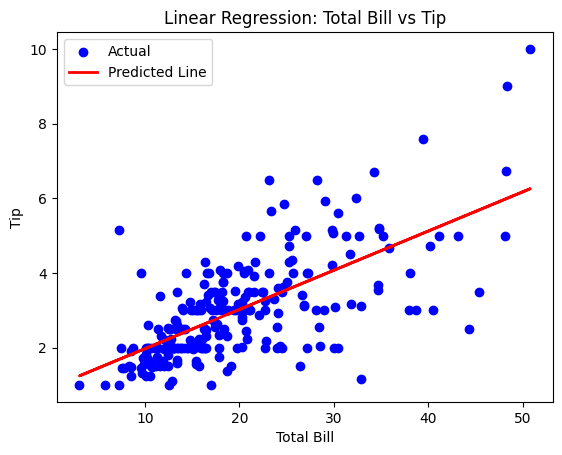

In [ ]:
# Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score

# Predictions
y_pred = result.predict(X)

# Evaluation metrics
print("R² Score:", r2_score(y, y_pred))
print("MSE:", mean_squared_error(y, y_pred))

# Visualization
plt.scatter(X['total_bill'], y, color="blue", label="Actual")
plt.plot(X['total_bill'], y_pred, color="red", linewidth=2, label="Predicted Line")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.title("Linear Regression: Total Bill vs Tip")
plt.legend()
plt.show()

#### `Conclusion`

* There is a positive correlation: larger bills generally lead to larger tips.
* However, the model explains less than half of the variation (R² = 0.46). This can indicate that total_bill alone is not enough to accurately predict tips.


#### `Recommendation`

* We need more features to make stronger predictions.
* we should try multiple linear regression by adding more predictors such as:

  * size (larger groups may give larger tips)

  * day or time (weekend vs weekday patterns)

  * smoker or sex (behavioral differences)

